In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.stats import chi2_contingency

/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data =  pd.read_excel('/Users/huyanshen/Desktop/4-8-table/four-types.xlsx', header=0)

In [29]:
data.columns.tolist()

['ID',
 'MRI-complete label (T1E&T2)',
 'Exclusion-list',
 'CohortID',
 'Geographical Location',
 'Race',
 'Date of Surgery',
 'Age',
 'Sex',
 'Hospital',
 'Molecular Subtypes',
 'Genetic Mutations',
 'Histological Subtypes',
 'Hydrocephalus before Surgery',
 'Tumor Texture',
 'Fourth-ventricle Infiltration',
 'Survival Status',
 'OS (months)',
 'OS-impute (months)',
 'Nanostring',
 'Recurrence-label_raw',
 'DFS (month)-raw',
 'DFS-impute (months)',
 'Radiotherapy',
 'Chemotherapy',
 'TumorResection',
 'ID.1',
 '转移情况/脊髓',
 '后遗症',
 '其他备注',
 'Nanostring.1']

In [4]:
intrst_list = ['Sex', 'Race', 'Tumor Texture', 'Histological Subtypes', 'TumorResection', 'Radiotherapy', 'Chemotherapy', 'Survival Status']

In [25]:
c = np.array([[3, 10, 9, 8],
             [115, 205, 76, 318]])
chi2, p_value, dof, expected = chi2_contingency(c, correction=True)
print("P-value:", p_value)

P-value: 0.006048498298285957


In [5]:
from scipy.stats import chi2_contingency
for cato in intrst_list:
    contig = pd.crosstab(data[cato], data['Molecular Subtypes'])[['WNT', 'SHH', 'G3', 'G4']]
    print(tabulate(contig, headers='keys', tablefmt='fancy_grid'))
    chi2, p_value, dof, expected = chi2_contingency(contig, correction=True)
    print("P-value:", p_value)

╒═══════╤═══════╤═══════╤══════╤══════╕
│ Sex   │   WNT │   SHH │   G3 │   G4 │
╞═══════╪═══════╪═══════╪══════╪══════╡
│ F     │    74 │    88 │   37 │  110 │
├───────┼───────┼───────┼──────┼──────┤
│ M     │    58 │   165 │   78 │  277 │
╘═══════╧═══════╧═══════╧══════╧══════╛
P-value: 2.449256397910823e-07
╒═══════════════════════════╤═══════╤═══════╤══════╤══════╕
│ Race                      │   WNT │   SHH │   G3 │   G4 │
╞═══════════════════════════╪═══════╪═══════╪══════╪══════╡
│ Asian                     │   124 │   220 │   94 │  336 │
├───────────────────────────┼───────┼───────┼──────┼──────┤
│ Black or African American │     1 │     0 │    0 │    4 │
├───────────────────────────┼───────┼───────┼──────┼──────┤
│ Other or not reported     │     2 │    12 │    5 │   10 │
├───────────────────────────┼───────┼───────┼──────┼──────┤
│ White                     │     5 │    21 │   16 │   37 │
╘═══════════════════════════╧═══════╧═══════╧══════╧══════╛
P-value: 0.0655541232894993
╒

In [4]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
subtypes = ['WNT', 'SHH', 'G3', 'G4']
for subtype in subtypes:
    print(f'For {subtype}')
    kmf = KaplanMeierFitter()
    kmf.fit(durations=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['OS-impute (months)'], event_observed=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['Survival Status'])
    time_points = [12, 24, 36, 48, 60]

    # Get survival probability at the specified time point
    for time_point in time_points:
        survival_prob = kmf.survival_function_at_times([time_point])
        print(f"Survival probability at {time_point} months:", survival_prob)

print("For all:")
kmf = KaplanMeierFitter()
kmf.fit(durations=data['OS-impute (months)'], event_observed=data['Survival Status'])
time_points = [12, 24, 36, 48, 60]

# Get survival probability at the specified time point
for time_point in time_points:
    survival_prob = kmf.survival_function_at_times([time_point])
    print(f"Survival probability at {time_point} months:", survival_prob)


For WNT
Survival probability at 12 months: 12    0.961106
Name: KM_estimate, dtype: float64
Survival probability at 24 months: 24    0.917301
Name: KM_estimate, dtype: float64
Survival probability at 36 months: 36    0.917301
Name: KM_estimate, dtype: float64
Survival probability at 48 months: 48    0.883327
Name: KM_estimate, dtype: float64
Survival probability at 60 months: 60    0.883327
Name: KM_estimate, dtype: float64
For SHH
Survival probability at 12 months: 12    0.903122
Name: KM_estimate, dtype: float64
Survival probability at 24 months: 24    0.793287
Name: KM_estimate, dtype: float64
Survival probability at 36 months: 36    0.680476
Name: KM_estimate, dtype: float64
Survival probability at 48 months: 48    0.635207
Name: KM_estimate, dtype: float64
Survival probability at 60 months: 60    0.597842
Name: KM_estimate, dtype: float64
For G3
Survival probability at 12 months: 12    0.765701
Name: KM_estimate, dtype: float64
Survival probability at 24 months: 24    0.705545
Nam

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_19845/3391382760.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kmf.fit(durations=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['OS-impute (months)'], event_observed=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['Survival Status'])
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_19845/3391382760.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kmf.fit(durations=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['OS-impute (months)'], event_observed=data[data['Geographical Location'] == 'East Asia'][data['Molecular Subtypes'] == subtype]['Survival Status'])
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_19845/3391382760.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kmf.fit(

In [8]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test

kmf = KaplanMeierFitter()
groups = data['Molecular Subtypes']
time = data['OS-impute (months)']
event = data['Survival Status']

# Perform log-rank test
results = multivariate_logrank_test(time, groups, event)

# Print the results (p-value)
p_value = results.p_value
print("Overall comparison (Multivariate Log-rank test) p-value:", p_value)

Overall comparison (Multivariate Log-rank test) p-value: 0.00014410889583569712


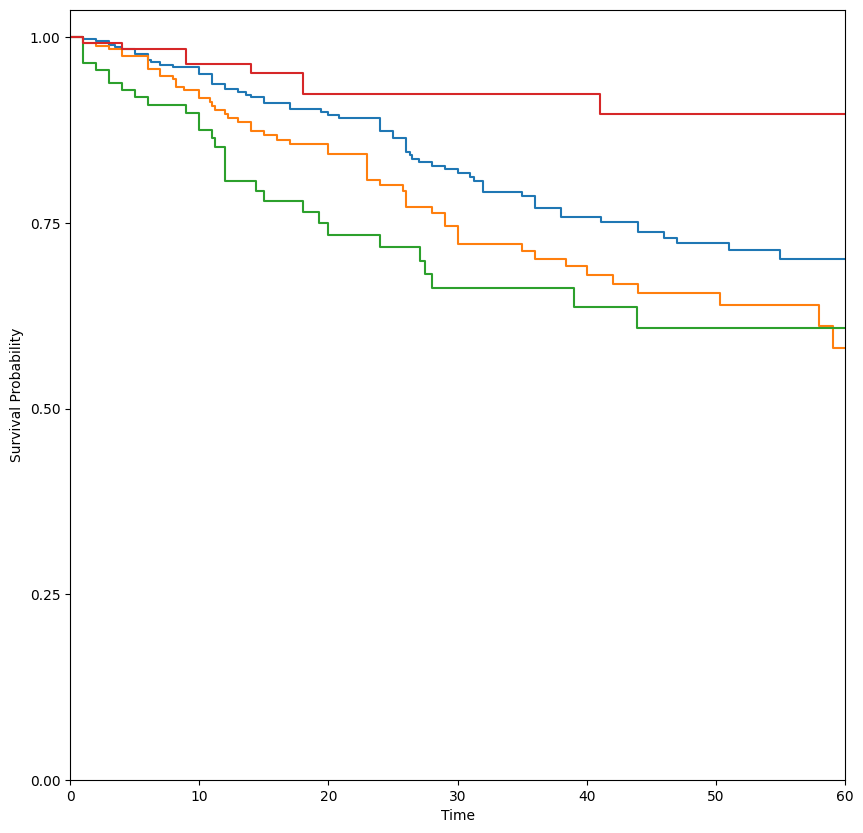

In [8]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Generate synthetic survival data for four groups

# Initialize a KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit and plot Kaplan-Meier curves for each group
plt.figure(figsize=(10, 10))
for group in data['Molecular Subtypes'].unique():
    group_data = data[data['Molecular Subtypes'] == group]
    kmf.fit(group_data['OS-impute (months)'], event_observed=group_data['Survival Status'], label=group)
    kmf.plot(ci_show=False)
    event_times = group_data.loc[group_data['Survival Status'] == 1, 'OS-impute (months)']


# Customize the plot
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.xlim(0, 60)
stride = 0.25  # Adjust this value based on your preference
plt.yticks(np.arange(0, 1.1, step=stride))
plt.legend().set_visible(False)
#plt.grid(True)
plt.show()
